Visualize job postings from the past deacde on www.mathjobs.org and arxiv publication data.

## Obtain and visualize data from the web archive

In [5]:
import sys
sys.path.append("../mathjobs")

from mathjob_ovtime import find_trends
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# prepare some data
x = list(range(2010, 2021))

key_words = [[r"(?i)mathematical physics", 0]]
key_word_counts = find_trends(x, key_words)

y = key_word_counts[r"(?i)mathematical physics"]

Text(0.5, 1.0, 'Mathematical physics jobs')

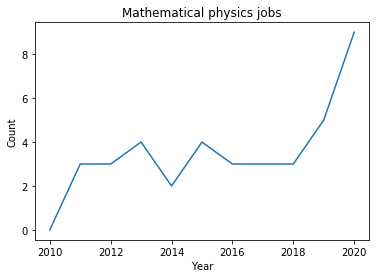

In [46]:
plt.plot(x, y)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Mathematical physics jobs")

In [7]:
def get_key_word_counts(query, start=2010, end=2019):
    """ Method to return a list of job postings for years
        'start' to 'end' using the given query. """
    x = list(range(start, end+1))

    key_words = [[query, 0]]
    key_word_counts = find_trends(x, key_words)

    y = key_word_counts[query]
    return y

Plot the job posting for differential geometry.

Text(0.5, 1.0, 'Differential geometry jobs')

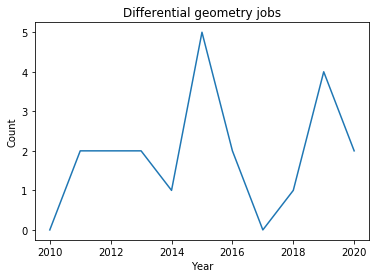

In [47]:
start = 2010
end = 2020
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)differential geometry", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Differential geometry jobs")

Plot the job posting for machine learning.

Text(0.5, 1.0, 'Machine learning jobs')

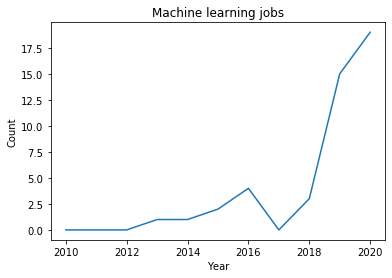

In [48]:
start = 2010
end = 2020
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)machine learning", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Machine learning jobs")

Plot the job posting for number theory.

Text(0.5, 1.0, 'Number theory jobs')

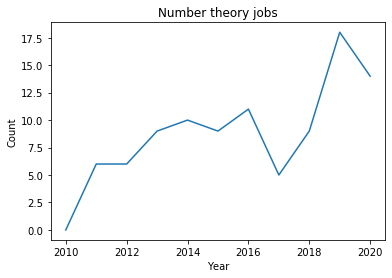

In [49]:
start = 2010
end = 2020
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)number theory", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Number theory jobs")

Text(0.5, 1.0, 'Teaching stream jobs')

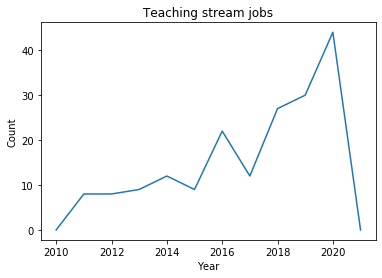

In [9]:
start = 2010
end = 2021
plt.plot(list(range(start, end+1)), get_key_word_counts(r"(?i)teach", start=start, end=end))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("Teaching stream jobs")

## Visualize arxiv publication data

In [10]:
import json
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
%%time
# Load the arxiv dataset found here: https://www.kaggle.com/Cornell-University/arxiv
metadata_list  = []
with open("../data/raw/archive/arxiv-metadata-oai-snapshot.json", 'r') as f:
    for line in f: 
        metadata_list.append(json.loads(line))

Wall time: 2min 40s


In [16]:
metadata = pd.DataFrame(metadata_list)
print(metadata.shape)
metadata.head(25)

(1915641, 14)


id            submitter  \
0   0704.0001       Pavel Nadolsky   
1   0704.0002         Louis Theran   
2   0704.0003          Hongjun Pan   
3   0704.0004         David Callan   
4   0704.0005   Alberto Torchinsky   
5   0704.0006         Yue Hin Pong   
6   0704.0007    Alejandro Corichi   
7   0704.0008         Damian Swift   
8   0704.0009          Paul Harvey   
9   0704.0010   Sergei Ovchinnikov   
10  0704.0011   Clifton Cunningham   
11  0704.0012          Dohoon Choi   
12  0704.0013          Dohoon Choi   
13  0704.0014         Koichi Fujii   
14  0704.0015      Christian Stahn   
15  0704.0016              Li Tong   
16  0704.0017        Nceba Mhlahlo   
17  0704.0018   Andreas Gustavsson   
18  0704.0019          Norio Konno   
19  0704.0020      Patrick Roudeau   
20  0704.0021       Yuichi Togashi   
21  0704.0022         Simon Malham   
22  0704.0023    Maria Loukitcheva   
23  0704.0024     Mikhail Kostylev   
24  0704.0025  Andrei Mishchenko S   

                                              authors  \
0   C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1                     Ileana Streinu and Louis Theran   
2                                         Hongjun Pan   
3                                        David Callan   
4            Wael Abu-Shammala and Alberto Torchinsky   
5                            Y. H. Pong and C. K. Law   
6   Alejandro Corichi, Tatjana Vukasinac and Jose ...   
7                                     Damian C. Swift   
8   Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...   
9                                  Sergei Ovchinnikov   
10             Clifton Cunningham and Lassina Dembele   
11                                        Dohoon Choi   
12                      Dohoon Choi and YoungJu Choie   
13                                       Koichi Fujii   
14                                    Christian Stahn   
15  Chao-Hsi Chang, Tong Li, Xue-Qian Li and Yu-Mi...   
16  Nceba Mhlahlo, David H. Buckley, Vikram S. Dhi...   
17                                 Andreas Gustavsson   
18                                        Norio Konno   
19          The BABAR Collaboration, B. Aubert, et al   
20  Vanessa Casagrande, Yuichi Togashi, Alexander ...   
21                   Simon J.A. Malham and Anke Wiese   
22      M. A. Loukitcheva, S. K. Solanki and S. White   
23        A.A. Serga, M. Kostylev, and B. Hillebrands   
24  A. S. Mishchenko (1 and 2) and N. Nagaosa (1 a...   

                                                title  \
0   Calculation of prompt diphoton production cros...   
1            Sparsity-certifying Graph Decompositions   
2   The evolution of the Earth-Moon system based o...   
3   A determinant of Stirling cycle numbers counts...   
4   From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...   
5   Bosonic characters of atomic Cooper pairs acro...   
6   Polymer Quantum Mechanics and its Continuum Limit   
7   Numerical solution of shock and ramp compressi...   
8   The Spitzer c2d Survey of Large, Nearby, Inste...   
9   Partial cubes: structures, characterizations, ...   
10  Computing genus 2 Hilbert-Siegel modular forms...   
11  Distribution of integral Fourier Coefficients ...   
12  $p$-adic Limit of Weakly Holomorphic Modular F...   
13             Iterated integral and the loop product   
14  Fermionic superstring loop amplitudes in the p...   
15                 Lifetime of doubly charmed baryons   
16  Spectroscopic Observations of the Intermediate...   
17    In quest of a generalized Callias index theorem   
18  Approximation for extinction probability of th...   
19  Measurement of the Hadronic Form Factor in D0 ...   
20  Molecular Synchronization Waves in Arrays of A...   
21                   Stochastic Lie group integrators   
22  ALMA as the ideal probe of the solar chromosphere   
23  Formation of quasi-solitons in transverse conf...   
24  Spectroscopic Properties of Polarons in Strong...   

                                             comments  \

In [23]:
metadata.shape

(1314461, 15)

In [31]:
metadata.iloc[20:45]["categories"]

8694                          physics.hist-ph physics.soc-ph
147685                                     cond-mat.mes-hall
146622                                    cond-mat.stat-mech
114807                                               math.CV
139686                      cond-mat.soft cond-mat.stat-mech
149697                                       math-ph math.MP
160578                                               math.DG
143163                                       math-ph math.MP
163961              cond-mat.stat-mech cond-mat.soft math.MG
154747                       physics.gen-ph physics.space-ph
64679                                               astro-ph
16578                                                math.PR
164998                               math.AP math-ph math.MP
131768                             hep-th cond-mat.quant-gas
1641213                                   cond-mat.stat-mech
164857                                                hep-th
122738                  

In [17]:
metadata["update_date_mod"] = pd.to_datetime(metadata.update_date)
metadata["id"] = 1

In [18]:
# Sort the publications by year and only work with publications from 2009 to 2020
metadata = metadata.sort_values("update_date_mod")[(metadata.update_date_mod < "2021-01-01") & (metadata.update_date_mod > "2009-12-31")]

C:\Users\krajarat\AppData\Local\Temp/ipykernel_31592/1548241886.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metadata = metadata.sort_values("update_date_mod")[(metadata.update_date_mod < "2021-01-01") & (metadata.update_date_mod > "2009-12-31")]


Plot publications from differential geometry over the past decade.

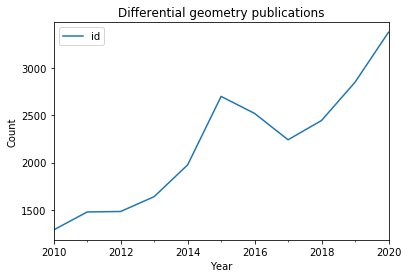

In [19]:
metadata[metadata.categories.str.contains("math.DG")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Differential geometry publications")

Plot publications from mathematical physics over the past decade.

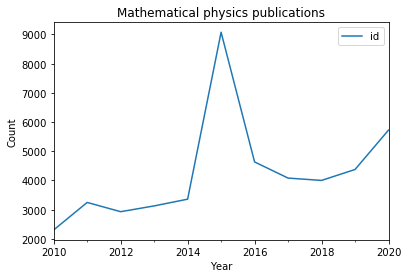

In [44]:
metadata[metadata.categories.str.contains("math.MP")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Mathematical physics publications")

Plot publications from number theory over the past decade.

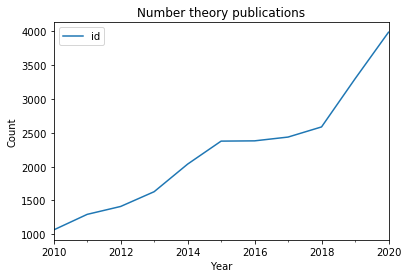

In [45]:
metadata[metadata.categories.str.contains("math.NT")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Number theory publications")

Plot publications from machine learning over the past decade.

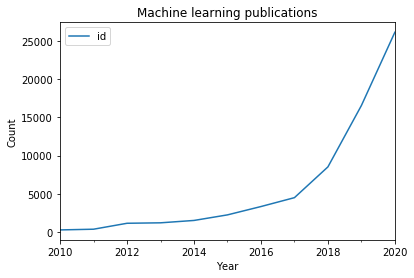

In [42]:
metadata[metadata.categories.str.contains("cs.LG")].resample("Y", on="update_date_mod").sum() \
.plot(xlabel="Year", ylabel="Count", title="Machine learning publications")